In [14]:
crab_data = read.csv("crabs.csv")

In [15]:
head(crab_data)

crab.id,body.size,major.claw,minor.claw,claw.ratio,major.side
1,11.00,14.75,3.96,3.72,Left
2,10.25,13.03,3.92,3.32,Right
3,9.55,14.60,3.57,4.09,Left
4,6.35,6.83,2.30,2.97,Left
5,9.45,13.17,3.38,3.90,Right
6,6.90,7.37,2.45,3.01,Right


In [16]:
str(crab_data)

'data.frame':	50 obs. of  6 variables:
 $ crab.id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ body.size : num  11 10.25 9.55 6.35 9.45 ...
 $ major.claw: num  14.75 13.03 14.6 6.83 13.17 ...
 $ minor.claw: num  3.96 3.92 3.57 2.3 3.38 2.45 2.93 4.13 3.76 2.45 ...
 $ claw.ratio: num  3.72 3.32 4.09 2.97 3.9 3.01 3.41 3.99 3.74 3.47 ...
 $ major.side: Factor w/ 2 levels "Left","Right": 1 2 1 1 2 2 1 1 2 1 ...


In [17]:
dim(crab_data)

[1] 50  6

In [18]:
summary(crab_data)

    crab.id        body.size        major.claw       minor.claw   
 Min.   : 1.00   Min.   : 4.850   Min.   : 5.050   Min.   :1.900  
 1st Qu.:13.25   1st Qu.: 6.862   1st Qu.: 7.985   1st Qu.:2.450  
 Median :25.50   Median : 7.425   Median : 8.760   Median :2.785  
 Mean   :25.50   Mean   : 7.871   Mean   : 9.621   Mean   :2.884  
 3rd Qu.:37.75   3rd Qu.: 8.887   3rd Qu.:11.305   3rd Qu.:3.280  
 Max.   :50.00   Max.   :11.300   Max.   :16.470   Max.   :4.130  
   claw.ratio    major.side
 Min.   :2.270   Left :28  
 1st Qu.:3.020   Right:22  
 Median :3.280             
 Mean   :3.295             
 3rd Qu.:3.625             
 Max.   :4.130             

Those few commands (head, str, summary, dim) should ALWAYS be the first you use when loading a new dataset. As you see, just by using the main commands for data exploration you already answered a whole question just by being able to read.

## Answer question 1i: Inference
## Answer question 1ii: see above
## Answer question 1iii: 50
## Answer question 1iv: 7.871
## Answer question 1v: 8.760
## Answer question 1vi: 22/50 = 44%


## Question 2

In [19]:
crab_data = crab_data[,-1] #deletes column id (first column)

In [20]:
head(crab_data)

body.size,major.claw,minor.claw,claw.ratio,major.side
11.00,14.75,3.96,3.72,Left
10.25,13.03,3.92,3.32,Right
9.55,14.60,3.57,4.09,Left
6.35,6.83,2.30,2.97,Left
9.45,13.17,3.38,3.90,Right
6.90,7.37,2.45,3.01,Right


In [21]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ ggplot2 3.2.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


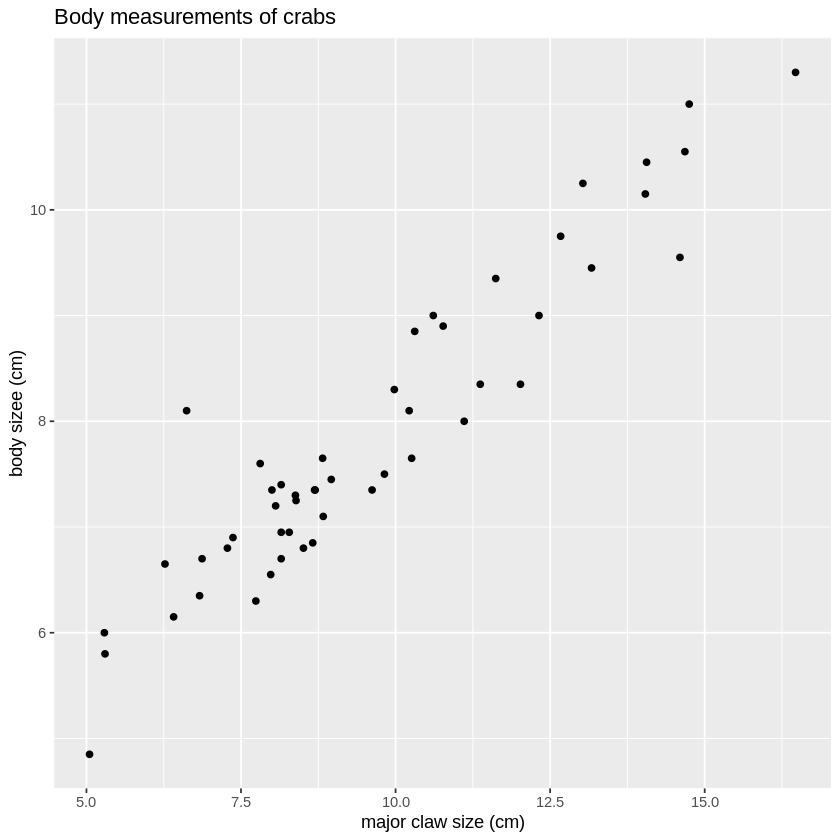

In [22]:
ggplot(data = crab_data) +
    geom_point(mapping = aes(x = major.claw, y=body.size)) +
    ggtitle('Body measurements of crabs') + xlab("major claw size (cm)") + ylab("body sizee (cm)") 
#ggtitle was not in the visualisation tutorial. guess what I did... correct. google gave me the answer in 10seconds
# http://www.sthda.com/english/wiki/ggplot2-title-main-axis-and-legend-titles
# 4 marks in 1 minute 


In [25]:
model_1 = lm(body.size ~ major.claw, data = crab_data)
deviance(model_1)
sum(resid(model_1)^2)

[1] 11.13622

[1] 11.13622

In [12]:
summary(model_1)


Call:
lm(formula = body.size ~ major.claw, data = crab_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80320 -0.38887  0.00362  0.28093  1.72510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.07461    0.25079   12.26   <2e-16 ***
major.claw   0.49853    0.02509   19.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4817 on 48 degrees of freedom
Multiple R-squared:  0.8916,	Adjusted R-squared:  0.8894 
F-statistic: 394.9 on 1 and 48 DF,  p-value: < 2.2e-16


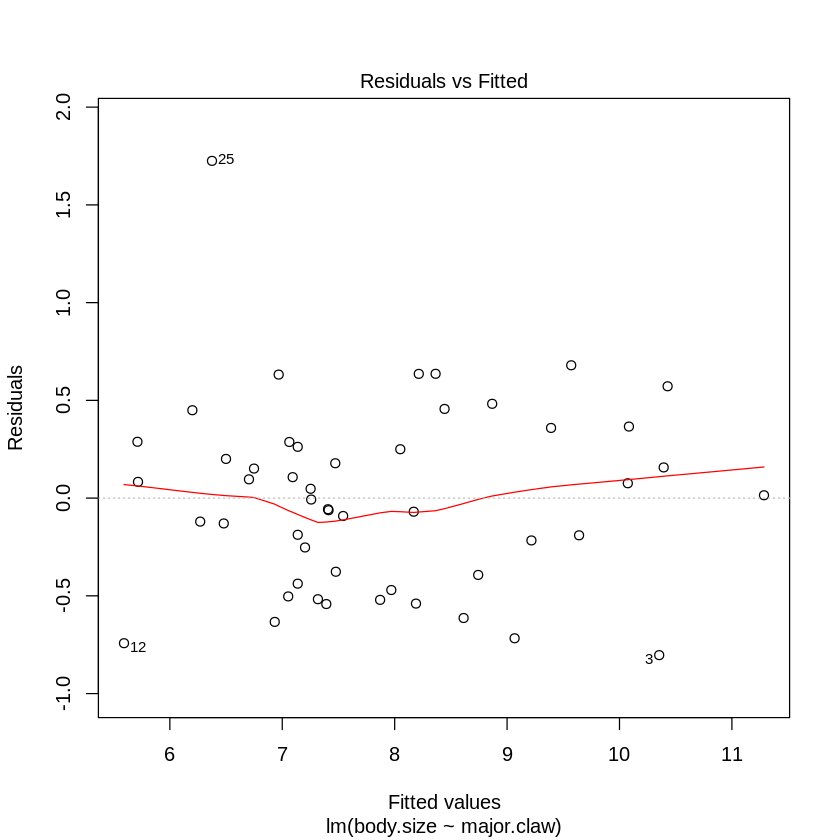

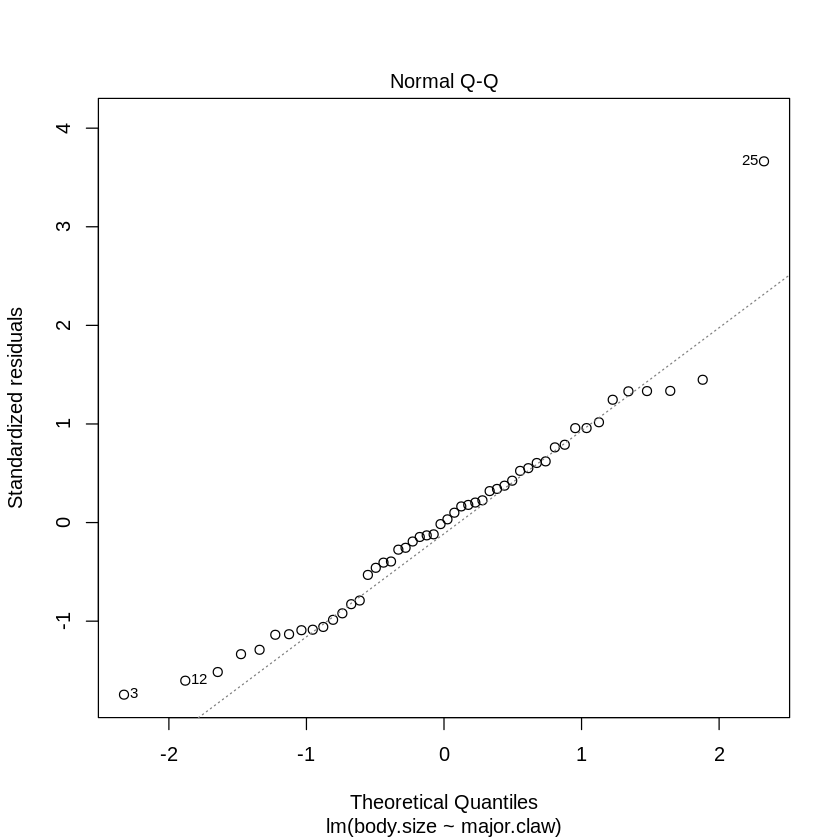

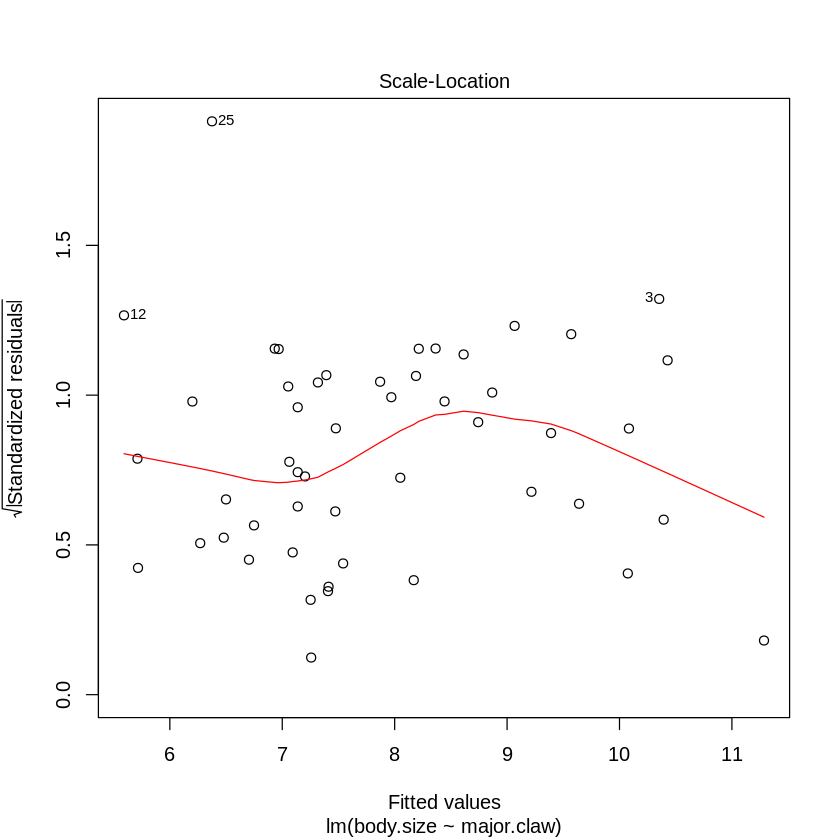

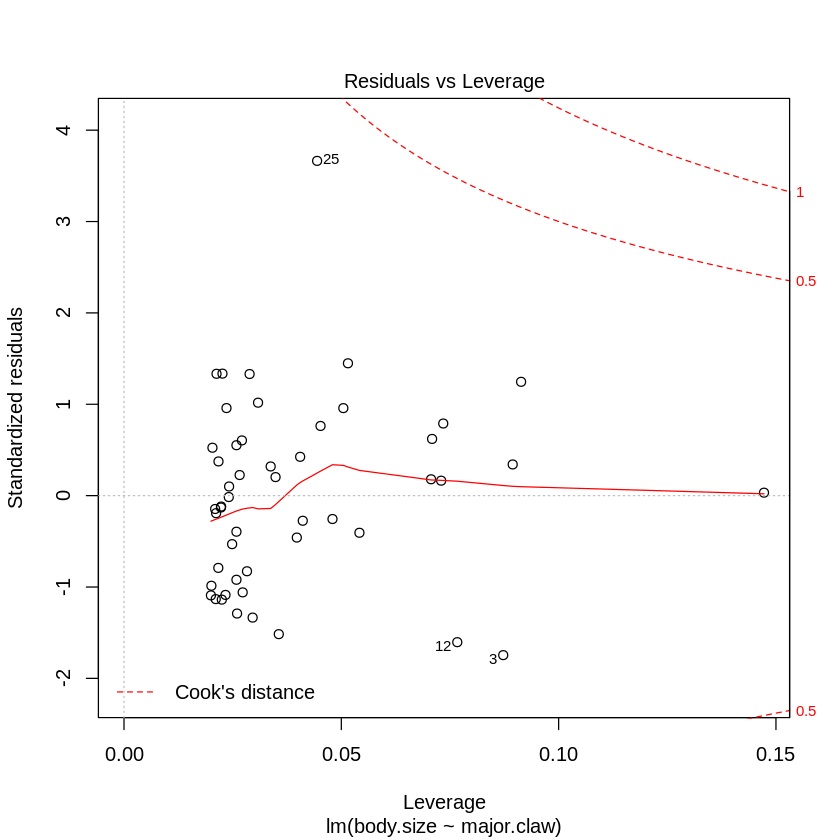

In [13]:
plot(model_1)

I am not sure what exactly the examinor wants to hear when saying "discuss", I will look into that. But since it's only 1 point I wouldnt worry too much. I will be marking and if you say that major claw size is a good predictor for bod size of the crab because the p-value is small and therefore significant and R² is high when building the model - you will definitely get that point.

In [27]:
predict(model_1,data.frame(major.claw = 10))

1 
8.059944

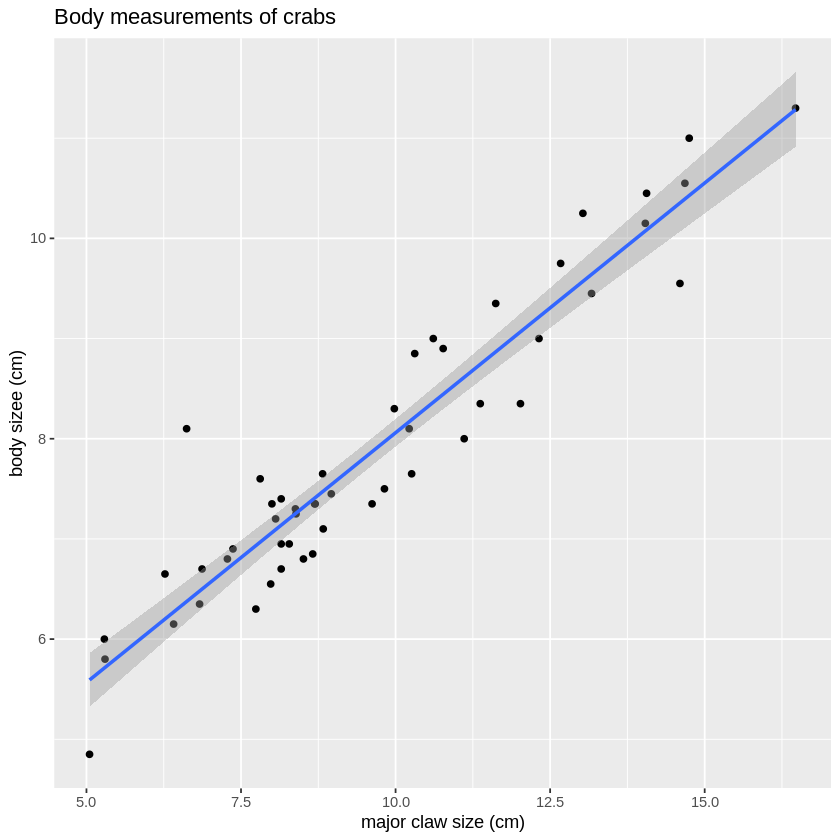

In [25]:
# test to graphically show that this is the correct prediction and you didnt make a mistake - this is NOT asked in the exam,
# I did it just for fun. but it MIGHT be asked in the exam this year. However, you don't have to do it that fancy
# you can also just use plot and abline
ggplot(data = crab_data, aes(major.claw,body.size)) +
    geom_point(mapping = aes(x = major.claw, y=body.size)) +
    ggtitle('Body measurements of crabs') + xlab("major claw size (cm)") + ylab("body sizee (cm)") +
    stat_smooth(method='lm', formula=y~x)

## Question 3

In [29]:
# in order to find that row we need to extract it using conditions. from the plot we see that it has a bodysize over 8
# but needs to have a claw size below 7.5

crab_data[crab_data$body.size > 8 & crab_data$major.claw < 7.5, ]


,body.size,major.claw,minor.claw,claw.ratio,major.side
25,8.1,6.62,2.92,2.27,Right


### Yes the position of the outlier is consistent with the hypothesis since the crab is way too big to have such a small claw and is therefore most likely regrowing a lost one

In [31]:
cor.test(crab_data$major.claw, crab_data$minor.claw) #method = c("pearson"))


	Pearson's product-moment correlation

data:  crab_data$major.claw and crab_data$minor.claw
t = 15.535, df = 48, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8513784 0.9501111
sample estimates:
      cor 
0.9132943 


### since you want to construct a model with the optimal number of variables, adding one which is highly correlated to another adds redundant information into your model (there are other problems as well which are not covered in this course). It also makes it more error prone and may result in a less stable model.

In [33]:
model_2 = lm(body.size ~ major.claw + claw.ratio, data =crab_data)

In [34]:
summary(model_2)


Call:
lm(formula = body.size ~ major.claw + claw.ratio, data = crab_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79819 -0.20021  0.00729  0.26113  0.94935 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.57351    0.43022  12.955  < 2e-16 ***
major.claw   0.65504    0.03056  21.435  < 2e-16 ***
claw.ratio  -1.21551    0.18897  -6.432 5.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.355 on 47 degrees of freedom
Multiple R-squared:  0.9424,	Adjusted R-squared:  0.9399 
F-statistic: 384.2 on 2 and 47 DF,  p-value: < 2.2e-16


In [35]:
anova(model_1, model_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
48,11.136220,NA,NA,NA,NA
47,5.922558,1,5.213662,41.37437,5.949026e-08


### this question is confusingly formulated. I assume for 4iv you say that the F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that does not contain the newly added variable. and for 4v you say that since the p-value is very small we can reject the null hypothesis that the new model has no more explanatory power than the old model.


In [36]:
model_3 = lm(body.size ~ major.claw + claw.ratio+major.side, data =crab_data)

In [37]:
summary(model_3) # we can already see that this variable doesnt add any value to the model


Call:
lm(formula = body.size ~ major.claw + claw.ratio + major.side, 
    data = crab_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8227 -0.1845 -0.0092  0.2341  0.9199 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.46566    0.45039  12.135 6.11e-16 ***
major.claw       0.65982    0.03118  21.159  < 2e-16 ***
claw.ratio      -1.20883    0.18974  -6.371 8.03e-08 ***
major.sideRight  0.09048    0.10803   0.838    0.407    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3561 on 46 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9395 
F-statistic: 254.8 on 3 and 46 DF,  p-value: < 2.2e-16


In [40]:
options(scipen=999)  #this disables scientific notation
anova(model_1, model_2,model_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
48,11.136220,NA,NA,NA,NA
47,5.922558,1,5.21366208,41.1116047,0.00000006971479
46,5.833595,1,0.08896262,0.7015023,0.40661005165212


### we see that the p-value for the third model is pretty high so we cannot reject the null hypothesis that the new model has more explanatory power (aka the added variable doesnt add any value)

## SECTION B

In [5]:
sb_data = read.csv('starbucks_data.csv')

In [6]:
head(sb_data)

day,frappucinos,sales_pounds
Tuesday,41,199.95
Wednesday,33,195.74
Thursday,34,102.68
Friday,27,162.88
Monday,20,101.76
Tuesday,23,186.94


In [7]:
summary(sb_data)
dim(sb_data)

        day      frappucinos     sales_pounds   
 Friday   : 9   Min.   : 3.00   Min.   : 61.94  
 Monday   : 9   1st Qu.:12.00   1st Qu.:119.88  
 Thursday :10   Median :23.00   Median :150.51  
 Tuesday  :10   Mean   :21.51   Mean   :148.22  
 Wednesday:10   3rd Qu.:30.00   3rd Qu.:179.02  
                Max.   :48.00   Max.   :240.87  
                NA's   :1       NA's   :1       

[1] 48  3

In [8]:
library(tidyr)
sb_data = drop_na(sb_data)

dim(sb_data)

[1] 47  3

In [53]:
#aggregate(x$sales_pounds, by=)
data_by_day = aggregate(sales_pounds ~ day, sb_data, sum)

In [54]:
data_by_day

day,sales_pounds
Friday,744.48
Monday,1101.11
Thursday,1733.04
Tuesday,1935.98
Wednesday,1451.81


### the info above gives us all tne info to answer the first 3 questions. The total sales for each day, the highest number of frappucinos is 48 and the mean value of sales on Mondays is 1101.11 / 9

In [69]:
monday_mean = 1101.11 / 9
monday_mean
friday_mean = 744 / 9

[1] 122.3456

In [12]:
# t-test

mon_fri = sb_data[sb_data$day == 'Monday' | sb_data$day == 'Friday', ]
#str(mon_fri)

t.test(sales_pounds~day, data = sb_data[which(sb_data$day =="Friday" | sb_data$day == "Monday"),],conf = 0.95)

t.test(sales_pounds ~ day, mu=0, alt="two.sided", conf=0.95, data=mon_fri)


	Welch Two Sample t-test

data:  sales_pounds by day
t = -2.0599, df = 12.671, p-value = 0.06057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -60.081233   1.510121
sample estimates:
mean in group Friday mean in group Monday 
             93.0600             122.3456 



	Welch Two Sample t-test

data:  sales_pounds by day
t = -2.0599, df = 12.671, p-value = 0.06057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -60.081233   1.510121
sample estimates:
mean in group Friday mean in group Monday 
             93.0600             122.3456 


### not statistically significant

In [4]:
head(crab_data)

crab.id,body.size,major.claw,minor.claw,claw.ratio,major.side
1,11.00,14.75,3.96,3.72,Left
2,10.25,13.03,3.92,3.32,Right
3,9.55,14.60,3.57,4.09,Left
4,6.35,6.83,2.30,2.97,Left
5,9.45,13.17,3.38,3.90,Right
6,6.90,7.37,2.45,3.01,Right


In [9]:
crab_data_raw = read.csv("raw.csv")

In [10]:
head(crab_data_raw)

crab.id,body.size,right.claw,left.claw
12,4.85,1.90,5.05
30,5.80,2.06,5.30
39,6.00,2.10,5.29
34,6.15,2.25,6.41
42,6.30,7.74,2.54
4,6.35,6.83,2.30


In [ ]:
crab_data_raw$major.side[crab_data_raw]

In [14]:
#with if-else
crab_data_raw$major.side = ifelse(crab_data_raw$right.claw > crab_data_raw$left.claw, "right", "left" )

In [15]:
head(crab_data_raw)

crab.id,body.size,right.claw,left.claw,major.side
12,4.85,1.90,5.05,left
30,5.80,2.06,5.30,left
39,6.00,2.10,5.29,left
34,6.15,2.25,6.41,left
42,6.30,7.74,2.54,right
4,6.35,6.83,2.30,right


In [ ]:
crab_data_raw = read.csv("raw.csv")

crab_data_raw$major.side = "none"


In [19]:
head(crab_data_raw)

crab.id,body.size,right.claw,left.claw,major.side
12,4.85,1.90,5.05,none
30,5.80,2.06,5.30,none
39,6.00,2.10,5.29,none
34,6.15,2.25,6.41,none
42,6.30,7.74,2.54,none
4,6.35,6.83,2.30,none


In [22]:
#without if-else
crab_data_raw$major.side[crab_data_raw$right.claw > crab_data_raw$left.claw] = "right"



In [23]:
head(crab_data_raw)

crab.id,body.size,right.claw,left.claw,major.side
12,4.85,1.90,5.05,none
30,5.80,2.06,5.30,none
39,6.00,2.10,5.29,none
34,6.15,2.25,6.41,none
42,6.30,7.74,2.54,right
4,6.35,6.83,2.30,right


In [24]:
crab_data_raw$major.side[crab_data_raw$right.claw < crab_data_raw$left.claw] = "left"

In [25]:
head(crab_data_raw)

crab.id,body.size,right.claw,left.claw,major.side
12,4.85,1.90,5.05,left
30,5.80,2.06,5.30,left
39,6.00,2.10,5.29,left
34,6.15,2.25,6.41,left
42,6.30,7.74,2.54,right
4,6.35,6.83,2.30,right


###  this also takes 20sec to google: assign value to column based on condition in other columnr R

In [36]:
crab_data_raw = crab_data_raw[order(crab_data_raw$crab.id),]

In [39]:
crab_data_raw

,crab.id,body.size,right.claw,left.claw,major.side
49,1,11.00,14.75,3.96,right
46,2,10.25,3.92,13.03,left
43,3,9.55,14.60,3.57,right
6,4,6.35,6.83,2.30,right
42,5,9.45,3.38,13.17,left
14,6,6.90,2.45,7.37,left
34,7,8.30,9.98,2.93,right
50,8,11.30,16.47,4.13,right
47,9,10.45,3.76,14.06,left
11,10,6.80,8.51,2.45,right
